# Régression linéaire à une variable - Exercices tirés du MOOC d'Andrew Ng

## Chargement des données

### Charger les données du fichier ex1data1.csv

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv("ex1data1.csv")

### Visualiser les données

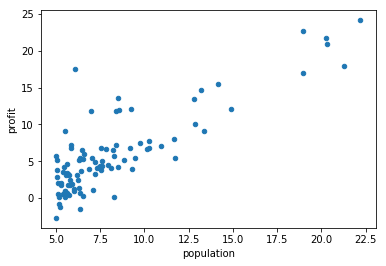

In [3]:
data.plot.scatter('population', 'profit')

### Découpez vos données en deux vecteurs X et y et transformerz-les en array numpy

Note: Les colonnes d'un Dataframe peuvent être sélectionnées par leur nom, de la même manière que dans un dictionnaire

In [4]:
X = np.array(data['population'])
y = np.array(data['profit'])

## Calcul d'une première prédiction

### Initialisez theta en un vecteur de deux valeurs à zéro

In [5]:
theta = np.zeros(2)

### Écrivez une fonction _predict_ qui prend en argument une population (x) ainsi que les parametres theta et prédit le profit (y) associé

In [6]:
def predict(X, theta):
    return (X * theta[1] + theta[0])

### Écrivez une fonction _fit_ qui prend en arguments le vecteur X et le vecteur y des données d'entraînement et renvoie le vecteur de paramètres _theta_ qui a été appris

In [7]:
def fit(X, y, theta, alpha, num_iters):
    # Initialiser certaines variable utiles
    m = X.shape[0]
    
    # Boucler sur le nombre d'itérations
    for itr in range(num_iters):
        loss = predict(X, theta) - y
        tmp_theta0 = theta[0] - (alpha / m) * sum(loss)
        tmp_theta1 = theta[1] - (alpha / m) * sum(loss * X.T)
        theta = [tmp_theta0, tmp_theta1]
        # Effectuer une itération de descente du gradient (i.e. on update theta une fois)
    return (theta)

### Lancez l'apprentissage en appelant la fonction _fit_ et en prenant bien soin de récupérer le résultat de *theta* à la fin!! Vous devriez obtenir des valeurs autour de [-3.6303, 1.1664]

Pour commencer, on fixera alpha à 0.01 et num_iters à 1500

In [8]:
theta = np.zeros(2)
finetuned_theta = fit(X, y, theta, 0.01, 1500)

## Visualiser la droite de régression

### Voici une fonction pour visualiser votre droite de régression (cadeau!) Vous pourrez l'appeler plus loin dans l'exercice

In [9]:
import matplotlib.pyplot as plt

def visualize(theta):
    fig = plt.figure()
    ax = plt.axes()
    ax.set_xlim([4.5,22.5])
    ax.set_ylim([-5, 25])
    ax.scatter(X, y)
    line_x = np.linspace(0,22.5, 20)
    line_y = theta[0] + line_x * theta[1]
    ax.plot(line_x, line_y)
    plt.show()

### Appelez la fonction pour visualiser la droite avec différentes valeurs de theta

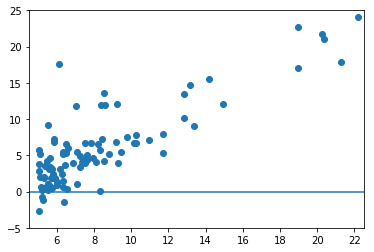

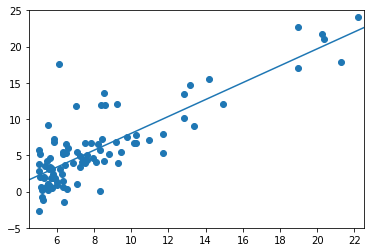

In [10]:
visualize(theta)
visualize(finetuned_theta)

## Fonction de coût

Maintenant voyons comment resserrer notre analyse de l'algorithme et calculons le coût (ou la perte, ou l'erreur) à chaque itération.

### Définissez la fonction de coût de votre modèle

In [11]:
def cost(X, y, theta):
    loss = predict(X, theta) - y
    cost = (1 / (2 * X.size)) * np.dot(loss, loss.T)
    return (cost)

### Testez-la avec theta = [0,0]   Vous devriez obtenir environ 32.07

In [12]:
cost(X, y, [0.0,0.0])

32.072733877455676

### Maintenant avec theta = [-1,2]. Vous devriez obtenir environ 54.24

In [13]:
cost(X, y, [-1,2])

54.24245508201238

### Copiez le code de votre fonction _fit_ et ajoutez-y un appel à la fonction _cost_, à chaque itération. Vous stockerez vos résultats dans une liste nommée J_history, que vous retournerez avec *theta* à la fin de la fonction

Et oui, en Python, une fonction peut retourner plus qu'une variable!!

In [14]:
def fit_with_cost(X, y, theta, alpha, num_iters):
   # À compléter
    m = X.shape[0]
    J_history = []
    # Boucler sur le nombre d'itérations
    for itr in range(num_iters):
        loss = predict(X, theta) - y
        tmp_theta0 = theta[0] - (alpha / m) * sum(loss)
        tmp_theta1 = theta[1] - (alpha / m) * sum(loss * X.T)
        theta = [tmp_theta0, tmp_theta1]
        J_history.append(cost(X, y, theta))
        # Effectuer une itération de descente du gradient (i.e. on update theta une fois)
    return (theta, J_history)

### Appelez la fonction en récupérant les valeurs de theta et J_history

In [15]:
# D'abord on réinitialise theta à zéro
theta = np.zeros(2)

In [16]:
# Lancez l'entraînement avec votre nouvelle fonction
theta, J_history = fit_with_cost(X, y, theta, 0.01, 10000)

### On visualise maintenant l'évolution du coût en fonction du nombre d'itérations

Vous pouvez voir si en modifiant les valeurs d'alpha et de num_iters, le graphique change d'allure

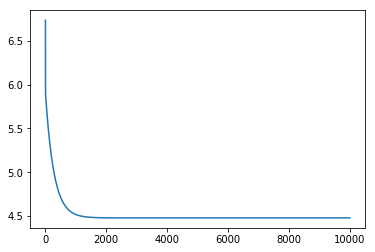

In [17]:
fit = plt.figure()
ax = plt.axes()
ax.plot(J_history)

# Exercices Numpy

 ## La suite d'exercices suivants a pour but de vous faire comprendre le fonctionnement des numpy array et leurs avantages/defaults par rapport aux listes de python.

### Creez une liste A nommée "list_A" contenant les éléments (0, 1, 1, 2, 3, 5, 8). A partir de cette liste créez un numpy array nommé "np_A"

In [18]:
list_A = [0,1,1,2,3,5,8]
np_A = np.array(list_A)

### Affichez votre numpy array. Ainsi que : sa forme, sa taille, sa dimension et son type

In [19]:
print(np_A.shape, np_A.size, np_A.ndim, np_A.dtype)

(7,) 7 1 int64


### Ajoutez 2 a chaque element de la liste "list_A"

In [20]:
list_A = [(elem + 2) for elem in list_A]
list_A

[2, 3, 3, 4, 5, 7, 10]

### Ajoutez 2 a chaque élément de votre numpy array (votre solution ne doit pas utiliser de boucles)

In [21]:
np_A = np_A + 2
np_A

array([ 2,  3,  3,  4,  5,  7, 10])

### Calculez la somme de tous les éléments de "np_A" (sans utiliser de boucle)

In [22]:
np_A.sum()

34

### Convertissez les elements de votre numpy array en float

In [23]:
np_A.astype(float)

array([ 2.,  3.,  3.,  4.,  5.,  7., 10.])

### Convertissez votre numpy array en une liste python

In [24]:
np_A.tolist()

[2, 3, 3, 4, 5, 7, 10]

### Exécutez les trois cellules suivantes pour visualiser les matrices M et N

In [25]:
M = np.random.randint(10, size=(100,100))
N = np.random.randint(10, size=(100,100))

In [26]:
M

array([[3, 9, 6, ..., 7, 7, 4],
       [2, 9, 8, ..., 3, 7, 3],
       [1, 7, 5, ..., 9, 9, 5],
       ...,
       [5, 7, 8, ..., 4, 7, 1],
       [7, 1, 9, ..., 5, 8, 2],
       [2, 2, 8, ..., 9, 2, 4]])

In [27]:
N

array([[1, 9, 2, ..., 4, 7, 7],
       [4, 6, 9, ..., 7, 3, 6],
       [2, 6, 9, ..., 3, 8, 7],
       ...,
       [6, 2, 1, ..., 2, 7, 9],
       [4, 7, 7, ..., 4, 8, 4],
       [9, 2, 7, ..., 1, 9, 9]])

### Aditionnez les deux matrices

In [28]:
M + N

array([[ 4, 18,  8, ..., 11, 14, 11],
       [ 6, 15, 17, ..., 10, 10,  9],
       [ 3, 13, 14, ..., 12, 17, 12],
       ...,
       [11,  9,  9, ...,  6, 14, 10],
       [11,  8, 16, ...,  9, 16,  6],
       [11,  4, 15, ..., 10, 11, 13]])

### Calculez le produit matriciel de M et N. Vérifiez votre opération en calculant les premières cellules à la main

In [29]:
np.dot(M, N)

array([[1823, 1714, 1835, ..., 1588, 1995, 1705],
       [1973, 2177, 2378, ..., 1913, 2290, 2136],
       [2086, 1832, 2310, ..., 1828, 2159, 1980],
       ...,
       [1972, 2031, 2380, ..., 1858, 2353, 1973],
       [1993, 1874, 2232, ..., 1642, 2105, 2001],
       [2095, 1919, 2261, ..., 1840, 1992, 2092]])

### ** Bonus: Écrivez vous-mêmes une fonction de produit matriciel, avec des boucles imbriquées 

In [30]:
def product_mat(arr1, arr2):
    res = np.zeros(arr1.shape[0] * arr2.shape[1])
    arr2 = arr2.T 
    i = 0
    for ar1 in arr1:
        for ar2 in arr2:
            res[i] = sum(ar1 * ar2)
            i += 1
    return(res.reshape(arr1.shape[0],arr2.T.shape[1]))

### ** Comparez son temps de calcul à la fonction de numpy avec de très grosses matrices en entrée

In [31]:
%time print(product_mat(M, N.T))
%time print(np.dot(M, N.T))

[[1571. 1714. 1879. ... 2085. 2020. 1782.]
 [1877. 2187. 2239. ... 2471. 2300. 2039.]
 [1835. 1981. 2030. ... 2301. 1947. 1882.]
 ...
 [1778. 2099. 1982. ... 2365. 2159. 1948.]
 [1720. 2106. 1965. ... 2363. 2140. 2013.]
 [1673. 2045. 2112. ... 2373. 2022. 2032.]]
CPU times: user 245 ms, sys: 3.28 ms, total: 248 ms
Wall time: 251 ms
[[1571 1714 1879 ... 2085 2020 1782]
 [1877 2187 2239 ... 2471 2300 2039]
 [1835 1981 2030 ... 2301 1947 1882]
 ...
 [1778 2099 1982 ... 2365 2159 1948]
 [1720 2106 1965 ... 2363 2140 2013]
 [1673 2045 2112 ... 2373 2022 2032]]
CPU times: user 1.51 ms, sys: 126 µs, total: 1.63 ms
Wall time: 1 ms


## Aller plus loin avec numpy (optionnal)

### Creez une liste a deux dimension ((1,2,3), (2,1,3), (3,2,1), (1,3,2)) nommée "list_B". Convertissez le en numpy array "np_B"

In [32]:
list_B = [[1,2,3],[2,1,3],[3,2,1],[1,3,2]]
np_B = np.array(list_B)

### Extrayez les deux premiere lignes et colonnes de "np_B". En sortie on obtient ((1,2),(2,1))

In [33]:
np_B[:2, :2]

array([[1, 2],
       [2, 1]])

### Creez un masque qui montre toutes les valeurs egales a 1. 

In [34]:
mask = np_B == 1
mask

array([[ True, False, False],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False]])

### Pour toutes les valeurs du masque multipliez la valeur par 3

In [35]:
np_B[mask] *= 3

### Creez un nouveau numpy array "np_C" avec les valeurs (0, 0, 1, 2, 3, 5, 8) (en 1 dimension)

In [36]:
np_C = np.array([0, 0, 1, 2, 3, 5, 8])

### Trouvez le minimum, maximum et la moyenne du numpy array "np_C"

In [37]:
np_C.min(), np_C.max(), np_C.mean()

(0, 8, 2.7142857142857144)

### Creez une fonction qui prend un nombre en parametre et renvoie son carré. Appliquez cette fonction a chaque element de votre numpy array a l'aide de la fonction vectorize 

In [38]:
def square(x):
    return(x**2)

v_square = np.vectorize(square)
v_square(np_C)

array([ 0,  0,  1,  4,  9, 25, 64])

### Changez la dimension cd "np_B" pour qu'elle passe de 4 * 3 a 3 * 4

In [39]:
np_B.reshape(3, 4)

array([[3, 2, 3, 2],
       [3, 3, 3, 2],
       [3, 3, 3, 2]])

### Changez la dimension de np_B pour passer a un numpy array d'une seule dimension (flatten, ravel)

In [40]:
np_B.flatten()

array([3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2])

### Travail sur une image

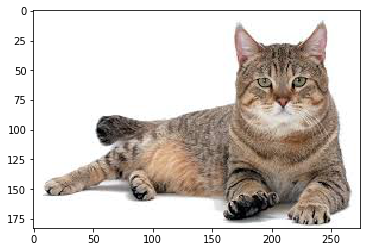

In [41]:
#install scikit-image
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline
photo = io.imread("cat.jpeg")
plt.imshow(photo)

### A l'aide du slicing inversez l'orientation de l'image (le bas est en haut)

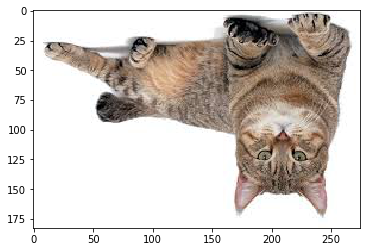

In [42]:
plt.imshow(photo[::-1])

### A l'aide du slicing créez un mirroir de l'image d'origine

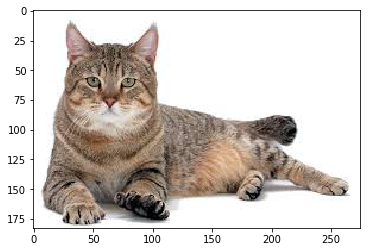

In [43]:
plt.imshow(photo[::,  ::-1])

### A l'aide de np.where appliquez un masque qui converti les pixels en dessous de 100 en 0 et au dessus en 255

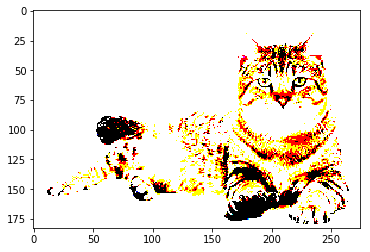

In [44]:
plt.imshow(np.where(photo < 100, 0, 255))

### Transposez l'image

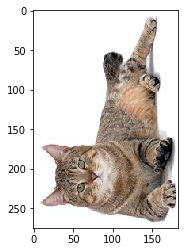

In [45]:
plt.imshow(photo.transpose(1, 0, 2))

Pour ceux souhaitant aller plus loin sur numpy quelques pistes intéressantes qui restent à explorer : les séquences, le sampling avec random choice, uniqs et count

## En résumé les numpy array ont les particularités suivantes :
- ils supportent des operations vectorizées (opérations sur chaque élements de la matrice)
- la taille d'un numpy array ne peux etre changé
- il n'y a qu'un type de donnée dans un numpy array
- ils prennent beaucoup moins de place 